<a href="https://colab.research.google.com/github/sdascoli/odeformer/blob/main/ODEFormer_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ODEFormer


In [30]:
import numpy as np
import matplotlib.pyplot as plt

!pip install odeformer
import odeformer
from odeformer.model import SymbolicTransformerRegressor
from odeformer.metrics import r2_score

dstr = SymbolicTransformerRegressor(
    from_pretrained=True)

model_args = {'beam_size':20,
        'beam_temperature':0.1}
dstr.set_model_args(model_args)

Found pretrained model at odeformer.pt
Loaded pretrained model


In [ ]:
times = np.linspace(0, 10, 50)
x = 2.3*np.cos(times+.5)
y = 1.2*np.sin(times+.1)
trajectory = np.stack([x, y], axis=1)

dstr.fit(times, trajectory)
pred_traj = dstr.predict(times, trajectory[0])

dstr.print()
r2_score(trajectory, pred_traj)

x_0' = -0.3146 * x_0 + -2.0653 * x_1
x_1' = 0.5417 * x_0 + 0.3268 * x_1


0.9961212437056189

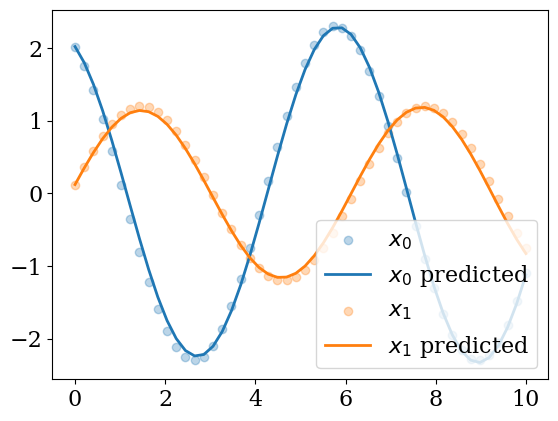

In [ ]:
pred_traj = dstr.predict(times, trajectory[0])
dimension = len(trajectory[0])
for dim in range(dimension):
    plt.scatter(times, trajectory[:, dim], color = f'C{dim}', label=f'$x_{dim}$', marker='o', alpha=.3)
    plt.plot(times, pred_traj[:, dim],  color = f'C{dim}', label=f'$x_{dim}$ predicted')
plt.legend()

# ODEBench

Here we reproduce the results of Figure 1.
Since Colab is not equipped with GPU support, we use a rather small batch size to obtain fast inference (10 instead of 50 in the paper), so results are a bit worse.
Feel free to test at beam size 50!

In [23]:
from odeformer.odebench.strogatz_equations import equations
from odeformer.odebench.solve_and_plot import config, process_equations, solve_equations, plot_prediction

indices = [9,16,27,40,52,54,62,63]
equations = [equations[i-1] for i in indices]
process_equations(equations)
solve_equations(equations, config)

VALIDATION DONE
PROCESSING DONE


100%|██████████| 8/8 [00:20<00:00,  2.53s/it]

SOLVING DONE


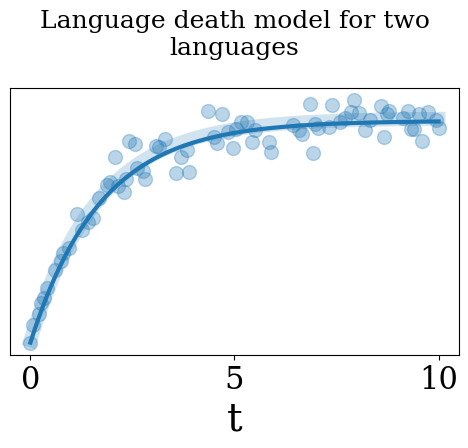

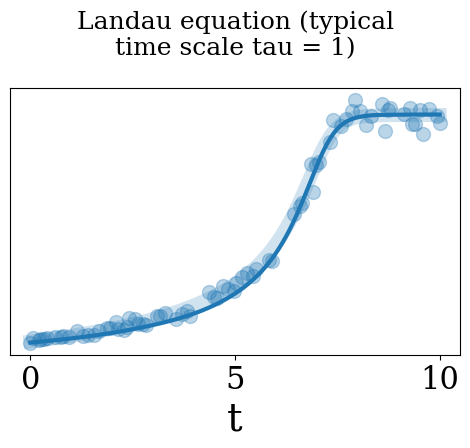

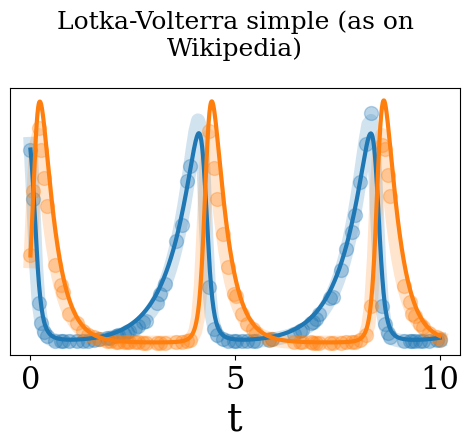

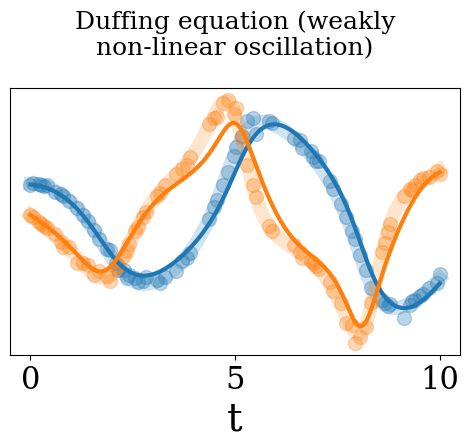

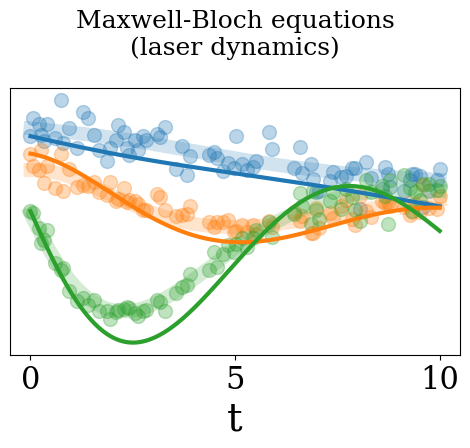

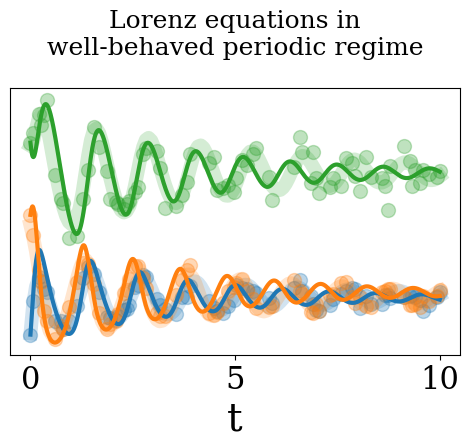

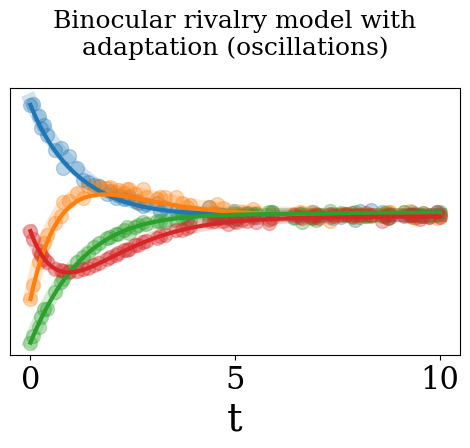

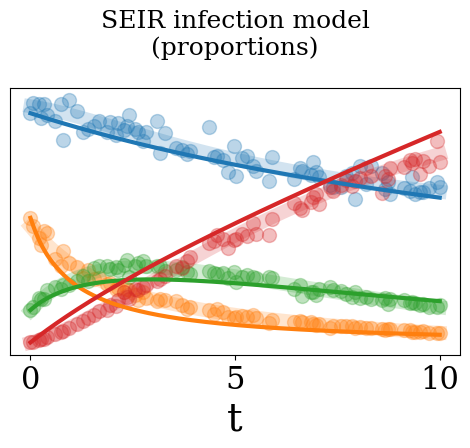

In [31]:
for equation in equations:
    plot_prediction(dstr, equation, seed=0, noise=.05, subsampling=.5)